순서
- train,val,test 파일 데이터 생성 - [p0001.jpg, p0002.jpg .........]
- val, test 라벨링 리스트 생성 - [0,0,0,0,0,0.......2,2,2,2,2,2] (클래스 구분 확인 필요 : 0,1,2 > 0, 3 > 2, 4 > 3)
- 전처리
    1. equal, blur 등 함수 생성
    2. 증강 (전체 5배로)

In [185]:
# from tensorflow import keras # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img



### train, val, test 파일 데이터 생성

In [186]:
train_dir='./train'
val_dir='./val'
test_dir='./test'
autest_dir='./auto_test'

In [187]:
import glob
# val, test, autotest

file_path = list(glob.glob(train_dir + "/*/*.*")) + list(glob.glob(autest_dir + "/*/*.*"))
level_0_1_2 = list(glob.glob(train_dir+"/0/*.*")) + list(glob.glob(train_dir+"/1/*.*")) + list(glob.glob(train_dir+"/2/*.*")) + list(glob.glob(autest_dir+"/0/*.*")) + list(glob.glob(autest_dir+"/1/*.*")) + list(glob.glob(autest_dir+"/2/*.*"))
level_3 = list(glob.glob(train_dir+"/3/*.*")) + list(glob.glob(autest_dir+"/3/*.*"))
level_4 = list(glob.glob(train_dir+"/4/*.*")) + list(glob.glob(autest_dir+"/4/*.*"))

v_file_path = list(glob.glob(val_dir + "/*/*.*"))
v_level_0_1_2 = list(glob.glob(val_dir+"/0/*.*")) + list(glob.glob(val_dir+"/1/*.*")) + list(glob.glob(val_dir+"/2/*.*"))
v_level_3 = list(glob.glob(val_dir+"/3/*.*"))
v_level_4 = list(glob.glob(val_dir+"/4/*.*"))

t_file_path = list(glob.glob(test_dir + "/*/*.*"))
t_level_0_1_2 = list(glob.glob(test_dir+"/0/*.*")) + list(glob.glob(test_dir+"/1/*.*")) + list(glob.glob(test_dir+"/2/*.*"))
t_level_3 = list(glob.glob(test_dir+"/3/*.*"))
t_level_4 = list(glob.glob(test_dir+"/4/*.*"))

print(len(file_path))     # 데이터 5778개
print(len(v_file_path))     # 데이터 826개
print(len(t_file_path))     # 데이터 1656개
print(len(level_0_1_2))     # 데이터 6130개
print(len(level_3))     # 데이터 957개
print(len(level_4))     # 데이터 217개

7304
826
1656
6130
957
217


### 검증, 테스트 라벨링

In [188]:
#valid
v_labels = []

for fp in v_file_path:
    tmp = os.path.dirname(fp)        # ~~~/0 부터 1,2,3,4 까지
    # print(tmp)
    class_name = os.path.split(tmp)  # [ ~~/train\ , '0' ] 혹은 [ ~~/train\ , '1' ] ... 4까지
    if class_name[1] == "0":
        v_labels.append(0)
    elif class_name[1] == "1":
        v_labels.append(0)
    elif class_name[1] == "2":
        v_labels.append(0)
    elif class_name[1] == "3":
        v_labels.append(1)
    else:
        v_labels.append(2)

print(len(v_labels))
print(v_labels[480:490])
print(v_labels[790:800])

826
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2]


In [189]:
#test
t_labels = []

for fp in t_file_path:
    tmp = os.path.dirname(fp)        # ~~~/0 부터 1,2,3,4 까지
    # print(tmp)
    class_name = os.path.split(tmp)  # [ ~~/train\ , '0' ] 혹은 [ ~~/train\ , '1' ] ... 4까지
    if class_name[1] == "0":
        t_labels.append(0)
    elif class_name[1] == "1":
        t_labels.append(0)
    elif class_name[1] == "2":
        t_labels.append(0)
    elif class_name[1] == "3":
        t_labels.append(1)
    else:
        t_labels.append(2)

print(len(t_labels))
print(t_labels[930:940])
print(t_labels[1600:1610])

1656
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 2, 2, 2, 2, 2]


### 데이터 전처리

In [190]:
import cv2
img = cv2.imread(file_path[1], cv2.IMREAD_GRAYSCALE)

In [191]:
img = img.reshape((224,224))
img.shape

(224, 224)

In [194]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import cv2
import os
import glob
import numpy as np

# data 경로 설정
data_dirs = ['./train/3', './auto_test/3']
augmented_images = []

# data 증강 설정
datagen = ImageDataGenerator(
    rotation_range=5,  # 회전 반경
    width_shift_range=0.2,  # 가로 이동
    height_shift_range=0.2,  # 세로 이동
    shear_range=0.2,  # 이미지 기울기
    zoom_range=0.2,  # 확대 배율
    horizontal_flip=True,  # 좌우 반전
    fill_mode='nearest'
)

for data_dir in data_dirs:
    file_paths = glob.glob(data_dir + "/*.*")  # 해당 폴더의 이미지 파일 경로 목록
    print(len(file_paths))
    
    for file_path in file_paths:
        img = image.load_img(file_path, color_mode='grayscale', target_size=(224, 224))  # 이미지 불러오기
        img = image.img_to_array(img)  # array로 변환
        img = img.squeeze()
        img = img.astype(np.uint8)
        img = cv2.equalizeHist(img)  # 이미지 히스토그램 평활화
        img = cv2.medianBlur(img, 5)  # 노이즈 제거
        img = img.reshape((1, 224, 224, 1))

        j = 0
        for batch in datagen.flow(img, batch_size=1):
            augmented_img = batch[0].reshape(224, 224)  # 이미지 증강
            augmented_images.append(augmented_img)
            j += 1
            if j >= 6:  # 증강 횟수 지정
                break
            
augmented_images = np.array(augmented_images)

print(len(augmented_images))

labels = []

# 증강 데이터 라벨링   
for ai3 in augmented_images:    
    labels.append(1) 

757
200
5742


In [195]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import cv2
import os
import glob
import numpy as np

# data 경로 설정
data_dirs = ['./train/4', './auto_test/4']
augmented_images = []

# data 증강 설정
datagen = ImageDataGenerator(
    rotation_range=5,  # 회전 반경
    width_shift_range=0.2,  # 가로 이동
    height_shift_range=0.2,  # 세로 이동
    shear_range=0.2,  # 이미지 기울기
    zoom_range=0.2,  # 확대 배율
    horizontal_flip=True,  # 좌우 반전
    fill_mode='nearest'
)

for data_dir in data_dirs:
    file_paths = glob.glob(data_dir + "/*.*")  # 해당 폴더의 이미지 파일 경로 목록
    print(len(file_paths))
    
    for file_path in file_paths:
        img = image.load_img(file_path, color_mode='grayscale', target_size=(224, 224))  # 이미지 불러오기
        img = image.img_to_array(img)  # array로 변환
        img = img.squeeze()
        img = img.astype(np.uint8)
        img = cv2.equalizeHist(img)  # 이미지 히스토그램 평활화
        img = cv2.medianBlur(img, 5)  # 노이즈 제거
        img = img.reshape((1, 224, 224, 1))

        j = 0
        for batch in datagen.flow(img, batch_size=1):
            augmented_img = batch[0].reshape(224, 224)  # 이미지 증강
            augmented_images.append(augmented_img)
            j += 1
            if j >= 20:  # 증강 횟수 지정
                break
            
augmented_images = np.array(augmented_images)

# 증강 데이터 라벨링   
for ai3 in augmented_images:    
    labels.append(2) 

173
44
1302


In [ ]:
print(len(labels))

10082


증강 완료(augmented_images)
augmented_images 라벨링 --> 2
나머지 데이터 라벨링
모든 데이터 이미지 전처리 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import glob
import numpy as np
import cv2

# data 경로 설정
data_dirs = ['./train', './auto_test']  # 본인 파일 경로

for data_dir in data_dirs:
    file_paths_all = list(glob.glob(data_dir + "/*/*.*"))
    print(len(file_paths_all))
    # 0,1,2,3,4 images 전처리
    for i in file_paths_all:
        img = image.load_img(i, color_mode='grayscale', target_size=(224, 224))  # 이미지 불러오기
        img = image.img_to_array(img)  # array로 변환
        img = img.squeeze()
        img = img.astype(np.uint8)
        img = cv2.equalizeHist(img)  # 이미지 히스토그램 평활화
        img = cv2.medianBlur(img, 5)  # 노이즈 제거
        img = np.expand_dims(img, axis=-1)  # 배치 차원 추가 (마지막 차원)
        img = cv2.resize(img, (224, 224))

        augmented_images.append(img)

augmented_images = np.array(augmented_images)
print(augmented_images.shape)

5778
1526
(7304, 224, 224)


In [ ]:
# 증강 데이터 제외 라벨링
data_dirs = ['./train', './auto_test']  # 본인 파일 경로
augmented_images = []

for data_dir in data_dirs:
    file_paths_all = list(glob.glob(data_dir + "/*/*.*"))
    print(len(file_paths_all))
    
    for fp in file_paths_all:
        tmp = os.path.dirname(fp)
        class_name = os.path.split(tmp)
        if class_name[1] == "0":
            labels.append(0)
        elif class_name[1] == "1":
            labels.append(0)
        elif class_name[1] == "2":
            labels.append(0)
        elif class_name[1] == "3":
            labels.append(1)
        else:
            labels.append(2)
               
print(len(labels))
print(labels[1500:1550])
print(labels[850:900])


5778
1526
17386
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# 데이터와 라벨 개수 맞는지 확인, shape 확인
augmented_images.shape, len(labels)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
from tensorflow.keras.utils import to_categorical
# y_train, y_test, y_val, y_autotest = to_categorical(labels), to_categorical(t_labels), to_categorical(v_labels), to_categorical(aut_labels)
y_train, y_test, y_val, y_autotest = np.array(labels), np.array(t_labels), np.array(v_labels), np.array(aut_labels)
y_train, y_test, y_val, y_autotest

(array([1, 1, 1, ..., 2, 2, 2]),
 array([0, 0, 0, ..., 2, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(len(v_file_path))     # 데이터 826개
print(len(t_file_path))     # 데이터 1656개
print(len(aut_file_path))     # 데이터 1526개

from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
image_width = 224
image_height = 224
num_channels = 3  # RGB 이미지이므로 채널 수는 3

v_dataset = np.ndarray(shape=(len(v_file_path), image_height, image_width, num_channels),dtype=np.float32)

i=0
for _file in v_file_path:
    img = load_img(_file, target_size=(image_height, image_width))
    img = img.convert('RGB')
    x = img_to_array(img)
    x /= 255.
    # print(x.shape)
    v_dataset[i] = x / 255.
    i += 1
    if i % 250 == 0:
        print(f"{i} images to array")
print("Done!")

826
1656
1526


250 images to array
500 images to array
750 images to array
Done!


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
image_width = 224
image_height = 224
num_channels = 3  # RGB 이미지이므로 채널 수는 3

t_dataset = np.ndarray(shape=(len(t_file_path), image_height, image_width, num_channels),dtype=np.float32)

i=0
for _file in t_file_path:
    img = load_img(_file, target_size=(image_height, image_width))
    img = img.convert('RGB')
    x = img_to_array(img)
    x /= 255.
    t_dataset[i] = x / 255.
    i += 1
    if i % 250 == 0:
        print(f"{i} images to array")
print("Done!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
Done!


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
image_width = 224
image_height = 224
num_channels = 3  # RGB 이미지이므로 채널 수는 3


aut_dataset = np.ndarray(shape=(len(aut_file_path), image_height, image_width, num_channels),dtype=np.float32)

i=0
for _file in aut_file_path:
    img = load_img(_file, target_size=(image_height, image_width))
    img = img.convert('RGB')
    x = img_to_array(img)
    # print(x.shape)
    aut_dataset[i] = x / 255.
    i += 1
    if i % 250 == 0:
        print(f"{i} images to array")
print("Done!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
Done!


In [ ]:
print(v_dataset.shape)
print(t_dataset.shape)
print(aut_dataset.shape)

(826, 224, 224, 3)
(1656, 224, 224, 3)
(1526, 224, 224, 3)


In [ ]:
from tensorflow.keras.utils import to_categorical

# preprocess - normalization -> /255.
x_train = augmented_images.astype('float32')/255.
x_test = t_dataset.astype('float32')/255.
x_val = v_dataset.astype('float32')/255.
x_autotest = aut_dataset.astype('float32')/255.
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((6658, 224, 224),
 (15860,),
 (1656, 224, 224, 3),
 (1656,),
 (826, 224, 224, 3),
 (826,))

## 데이터 수치화 완료
- train데이터 : x_train / x_test / x_val / x_autotest
- target데이터 : y_train / y_test / y_val / y_autotest

In [ ]:
x_train = to_categorical(x_train, 3)
y_train = to_categorical(y_train, 3)
y_val = to_categorical(y_val, 3)
y_test = to_categorical(y_test, 3)
y_autotest = to_categorical(y_autotest, 3)
print(x_train.shape, x_val.shape, x_test.shape, x_autotest.shape)
print(y_train.shape, y_val.shape, y_test.shape, y_autotest.shape)

(6658, 224, 224, 3) (826, 224, 224, 3) (1656, 224, 224, 3) (1526, 224, 224, 3)
(15860, 3) (826, 3) (1656, 3) (1526, 3)


In [ ]:
y_val = np.concatenate((y_val, y_autotest), axis=0)
x_val = np.concatenate((x_val, x_autotest), axis=0)

### 모델 생성

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
# ResNet50 모델 불러오기 (이미 ImageNet 데이터셋으로 사전 훈련됨)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 모델 구성하기
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 예시로 3개의 클래스를 분류하는 모델이라고 가정
])

# ResNet50의 가중치는 고정
base_model.trainable = False

# 모델 컴파일하기
optimizer = Adam(learning_rate=0.00001)  # 학습률 0.00001 선택
model.compile(optimizer=optimizer,
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 훈련에 사용할 배치 크기와 에포크 수
BATCH_SIZE = 32  # 배치 크기 32 선택
EPOCHS = 30  # 에포크 수 30 선택

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_18 (Dense)            (None, 512)               51380736  
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 3)                

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (possible_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50

def build_model():
    # ResNet50 모델 불러오기 (이미 ImageNet 데이터셋으로 사전 훈련됨)
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # 모델 구성하기
    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # 예시로 3개의 클래스를 분류하는 모델이라고 가정
    ])
    # ResNet50의 가중치는 고정
    base_model.trainable = False

    return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD

# 모델 구성
model = build_model()

# 모델 컴파일하기
optimizer = SGD(learning_rate=0.00001)  # 학습률 0.00001 선택
model.compile(optimizer=optimizer,
              loss=CategoricalCrossentropy(),
              metrics = ['accuracy',
               recall_m,
               precision_m,
               f1_m]
)

# 훈련에 사용할 배치 크기와 에포크 수
BATCH_SIZE = 32  # 배치 크기 32 선택
EPOCHS = 3  # 에포크 수 30 선택

saveCheckpointsPath = "ResNet50SavedModels/improved-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(saveCheckpointsPath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 6)
log_csv = CSVLogger("Logs/AlexNetLogs.csv", separator = ',', append = False)  # 손실, 정확률 등 csv로 기록함

In [ ]:
# 모델 훈련하기
history = model.fit(x_train, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_val, y_val),
                    callbacks=(checkpoint,early_stop))

ValueError: Data cardinality is ambiguous:
  x sizes: 6658
  y sizes: 15860
Make sure all arrays contain the same number of samples.

In [ ]:
sess = tf.compat.v1.Session(config = tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping: no known devices.


### 예측

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test)
predicted_class = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
print(predicted_class[:20])
print(true_classes[:20])

52/52 [==============================] - 67s 1s/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### 시각화

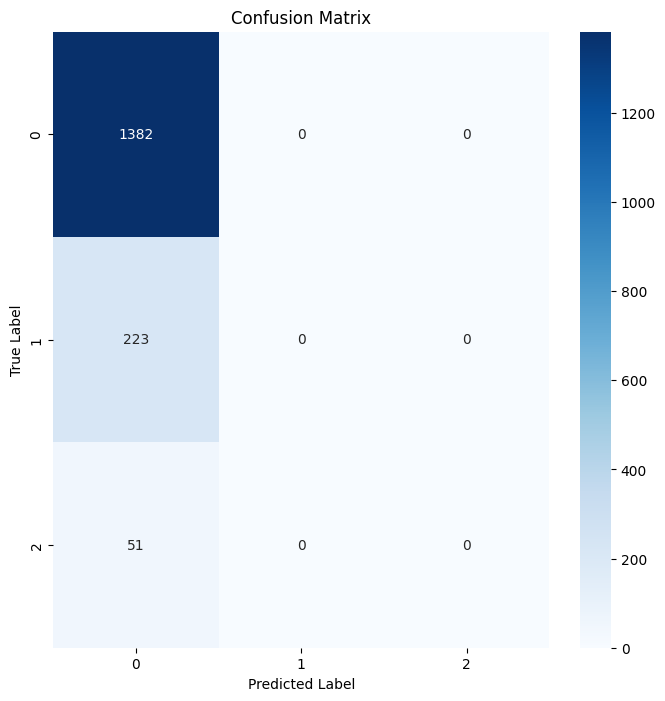

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(true_classes, predicted_class)
plt.figure(figsize=(8, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

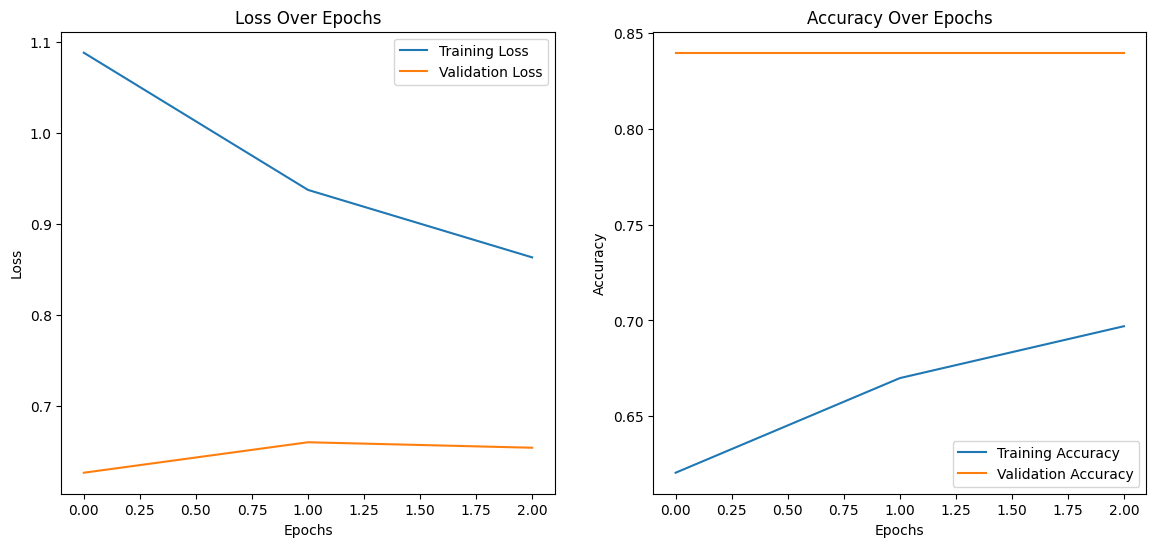

In [ ]:
# Train, Val 시각화 - Loss 
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# 시각화
plt.figure(figsize=(20,5))
for i, key in enumerate(list(history.history.keys())[:5]):
    plt.subplot(1, 5, i+1)
    plt.title(key)
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel('Epochs')
    plt.legend([key, 'val_'+key])
plt.show()

## 예측

In [ ]:
Y_pred = model.predict(x_test)

52/52 [==============================] - 62s 1s/step


In [ ]:
Y_pred_argmax = np.argmax(np.array(Y_pred), axis=1)
Y_pred_argmax

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# 예측 결과 시각화
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test.argmax(-1), Y_pred_argmax))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1382
           1       0.00      0.00      0.00       223
           2       0.00      0.00      0.00        51

    accuracy                           0.83      1656
   macro avg       0.28      0.33      0.30      1656
weighted avg       0.70      0.83      0.76      1656



c:\Users\KOREAVC\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KOREAVC\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KOREAVC\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import seaborn as sns

heatmap = sns.heatmap(confusion_matrix(y_test.argmax(-1), Y_pred_argmax), annot=True, fmt='.3g', 
                      xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'], cmap='magma')
heatmap.set_xlabel('Predicted Label')
heatmap.set_ylabel('True Label')
plt.show()

### Inference

In [ ]:
import numpy as np
# 이미지 9개 랜덤 추출
idx = np.random.randint(0, len(x_test), 9)

In [ ]:
target_x, target_y = x_test[idx], y_test[idx]
predictions = model.predict(target_x)
predictions = predictions.argmax(axis=-1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
label_name = {
    0: 'Normal',
    1: 'light',
    2: 'severe'
}

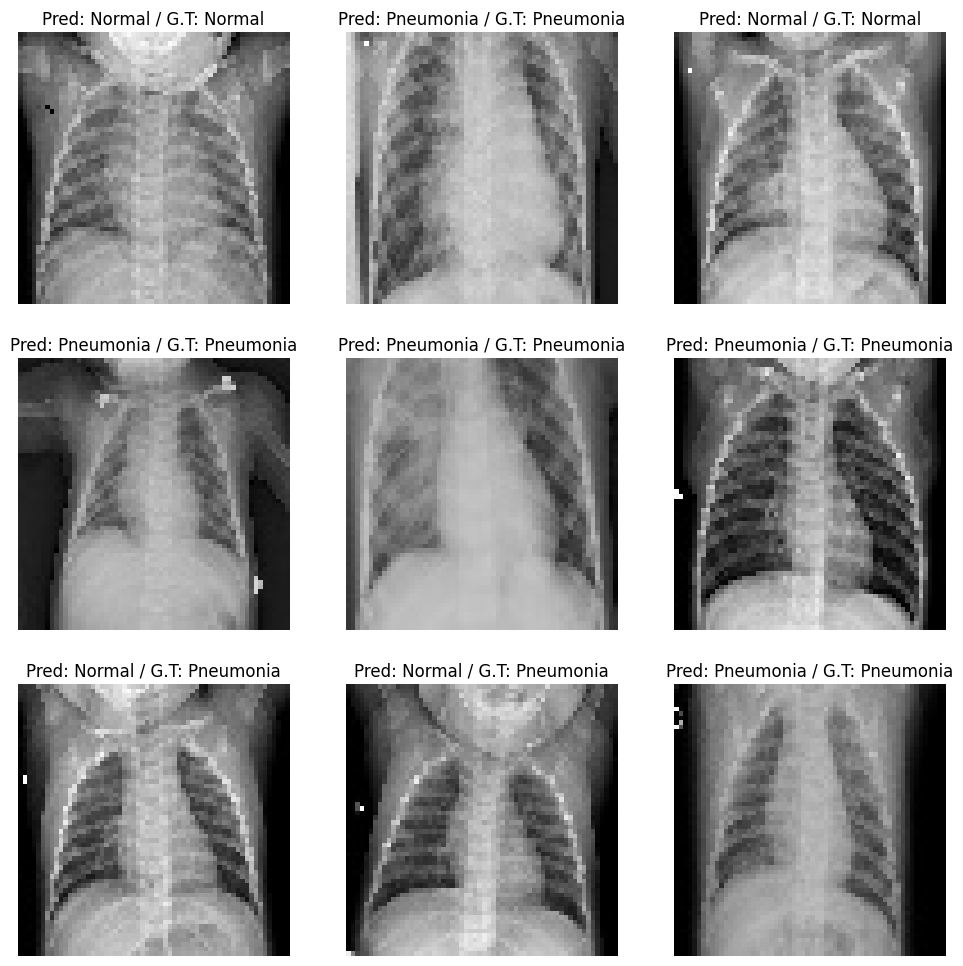

In [ ]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    pred = label_name[predictions[i]]
    gth = label_name[y_test[i].argmax()]
    
    plt.title(f"Pred: {pred} / G.T: {gth}")
    
    plt.imshow(target_x[i])
    plt.axis('off')
    
plt.show()